# Statistical Machine Learning (F20ML) Coursework 2022-2023

### Contents included in this Python source code:
- Information and breakdown of the dataset
- Decision Tree algorithm for classification
- Alternative approach to classify the dataset (s.t. Neural Network, Naïve Bayes and KNN)
- Finetune, cross-validate and perform evaluation for the classification algorithm

Import basic tools to compute the simulation:

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier


Import data provided from the source below:

**Data Source:** https://archive.ics.uci.edu/ml/datasets/wine

In [20]:
df = pd.read_csv("wine.data", names = ["Class",
                                       "Alcohol",
                                       "Malic acid",
                                       "Ash",
                                       "Alcalinity of ash",
                                       "Magnesium",
                                       "Total phenols",
                                       "Flavanoids",
                                       "Nonflavanoid phenols",
                                       "Proanthocyanins",
                                       "Color intensity",
                                       "Hue",
                                       "OD280/OD315 of diluted wines",
                                       "Proline"])

Identify missing/invalid value and type of data:

In [21]:
df.info() # check data type and count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [22]:
#just display to the first 10 rows.
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Organise and split the data:

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#setting the values for the x an y where x is without class 
#y takes all values of class
X = df.drop("Class", axis = 1).values # putting feature variable to X
Y = df["Class"].values # putting response variable to y

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=8849) # split the data into training and testing sets

## Decision Tree Classification

Implementing **Decision Tree Algorithm** for classification from scratch:

**Code Ref. 1:** https://github.com/AssemblyAI-Examples/Machine-Learning-From-Scratch/blob/main/04%20Decision%20Trees/DecisionTree.py

**Code Ref. 2:** http://www.oranlooney.com/post/ml-from-scratch-part-4-decision-tree/

In [26]:
from collections import Counter

In [27]:
class Node:
    """
    Node class 
    """
    def __init__(self, feature=None, threshold=None, left=None, right=None,value=None):
        """
        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value


In [28]:
class DecisionTreeGraph:
    """
    This is a class to create a DecisionTreeGraph. It contains all functions needed for a decision tree.
    Object from this class can use any method from this class. 

    To create the decision tree I referred to the website mentioned below. 
    @source : https://github.com/AssemblyAI-Examples/Machine-Learning-From-Scratch/blob/main/04%20Decision%20Trees/DecisionTree.py
    """
    def __init__(self, min_split=2, max_depth=20, feature=None):
        """
        @param min_split: this parameter is used to know by how much the samples need to be split. 
                If a value is not intialized, min_sample will have a value of 2
        @param max_depth: this parameter is used to see the maximum depth. 
                If no value has been initialized, max_depth takes a value of 50. 
        @param feature: This variable is used to store the feature. 
                If no feature is intialized then the feature will be None
        @param root: The root of the decision tree is none. 

        init method is used t initialized (constructor) all the variables needed for the decision tree. 
        """
        self.min_split=min_split
        self.max_depth=max_depth
        self.feature=feature
        self.root=None


    def fit(self, X, y): 
        """
        @param feature: This parameter use the numpy function to store the columns
        @param X: This parameter takes the X train values. X is independent 
        @param y: This parameter takes the y train values. y is responsive

        This method is used to create a decision tree classifier from the training set X and y
        """
        if not self.feature: # the if condition checks to see if the node has any features. 
            #If the node has features then we enter
            self.feature = X.shape[1]  # we set the features to include the columns 
        else: #Enter this condition because there is no features, hence we need to start from the root. 
            self.features = min(X.shape[1],self.feature) #We check the minimum value for the features. 
        self.root = self.grow_tree(X,y)  # we set the grow tree method from the root.


    def grow_tree(self, X, y, current_max_depth=0):
        """
        @param X: This parameter takes the X train values. X is independent 
        @param y: This parameter takes the y train values. y is responsive
        @param current_max_depth: This parameter keeps count of the changes in depth value.
        @param noOfLabels: This variable is used to store the length. 
        This method helps to create a decision tree from a dataset. The growth starts from the root and then
        """
        # Here the .shapereturn the number of elements in the first dimension which is the row and also return the number of elements in the second dimension which is columns 
        rows, columns = X.shape 
        # Here np.unique returns the unique values in a list. This can be in any number of nested list. After we get the unique values, we can use the len to find the length
        #This length value is stored in a parameter called noOfLabels
        noOfLabels = len(np.unique(y)) 
        
        if (current_max_depth>=self.max_depth or noOfLabels==1 or rows<self.min_split):
            
            counter = Counter(y)
            leaf_value = counter.most_common(1)[0][0]
            child_node = Node()
            child_node.value = leaf_value
            return child_node
        else:
            features_index = np.random.choice(columns, self.feature, replace=False)

            # find the best split
            best_feature, best_threshold = self.perfect_split(X, y, features_index)

            # create child nodes
            child_node = Node() #creating a new child node
            left_index, right_index = self.split(X[:, best_feature], best_threshold)
            child_node.left = self.grow_tree(X[left_index, :], y[left_index], current_max_depth+1)
            child_node.right = self.grow_tree(X[right_index, :], y[right_index], current_max_depth+1)
            child_node.feature = best_feature
            child_node.threshold = best_threshold
            return child_node
    
    def perfect_split(self, X, y, features_index):
        best_gain = -float("inf") # to start with the lowest value. 
        split_index = 0 # Stores the index. Initalised with 0 as that is the start index.
        split_threshold = 0 # Stores the threshold. Initalised with 0 as that is the start index.

        for i in features_index:
            columns = X[:, i] # here it stores the columns in x
            thresholds = np.unique(columns) # we can use unique to fin d

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, columns, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_index = i
                    split_threshold = thr

        return split_index, split_threshold

    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_index, right_index = self.split(X_column, threshold)

        if len(left_index) == 0 or len(right_index) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_index), len(right_index)
        e_l, e_r = self._entropy(y[left_index]), self._entropy(y[right_index])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def split(self, X_column, split_thresh):
        left_index = np.argwhere(X_column <= split_thresh).flatten()
        right_index = np.argwhere(X_column > split_thresh).flatten()
        return left_index, right_index

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def predict(self, X):
        return np.array([self.tree_traversal(x, self.root) for x in X])

    def tree_traversal(self, x,node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self.tree_traversal(x, node.left)
        return self.tree_traversal(x, node.right)

Build Decision Classification Tree:

In [29]:
dt = DecisionTreeGraph()
dt.fit(X_train, y_train)

Test accuracy of the Decision Classification Tree:

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score


The accuracy score of the Decision Tree is 0.8444444444444444
              precision    recall  f1-score   support

           1       0.83      0.91      0.87        11
           2       0.87      0.72      0.79        18
           3       0.83      0.94      0.88        16

    accuracy                           0.84        45
   macro avg       0.84      0.86      0.85        45
weighted avg       0.85      0.84      0.84        45



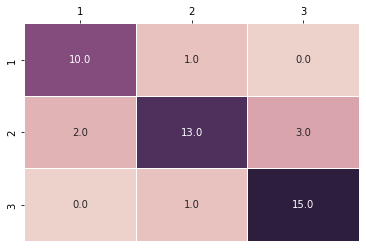

In [31]:
np.random.seed(5)
y_pred = dt.predict(X_test) # to predict the x test values. 

accuracy = accuracy_score(y_test, y_pred) # to calculate the accuracy score
report = classification_report(y_test, y_pred) # x test values classification report 
cm = confusion_matrix(y_test, y_pred) # compute the confusion matrix

print("The accuracy score of the Decision Tree is", accuracy); 
print(report)
heatMapPlot = sns.heatmap(cm, cmap =sns.cubehelix_palette(as_cmap=True), annot = True, cbar = False, xticklabels = ["1", "2", "3"], yticklabels = ["1", "2", "3"],linewidth=.5,fmt=".1f")
heatMapPlot.xaxis.tick_top()

In [32]:
print("F Score:", f1_score(y_test, y_pred, average ='weighted'))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred, average ='weighted'))
print("Recall Score:", recall_score(y_test, y_pred, average ='weighted'))

F Score: 0.8414373918210234
Accuracy Score: 0.8444444444444444
Precision Score: 0.8466666666666667
Recall Score: 0.8444444444444444


Finetune the hyperparameters of Decision Classification Tree while performing 10-fold cross-validation:

In [33]:
df_random = df.sample(frac = 1)

X_random = df_random.drop("Class", axis = 1) # putting randomized feature variable to X
y_random = df_random["Class"] # putting randomized response variable to y

In [34]:
print("The size of the data is:",len(df_random))
partition = len(df_random)//10
print("When we perform 10-fold cross-validation, we get:",len(df_random)/10, "we need to split the value to not get decimal points."  ) 

partition_remainder = len(df_random)%10
print("After we split the values, we get "+str(partition)+" and "+str(partition_remainder))


partitionlst = [] #list to store the partitioned values. 
#as we are doing 10 folds cross validation and we split the data into 10 parts each, the for loop as to range over 10. 
#As we started from 0 and ends on 9, this comes up to a total of 10. 
for i in range(0, 10):
    if len(partitionlst) == 0:
        partitionlst.append(0) # the first value has to be zero. 
    #this if condition checks if the i value is less than the remainder value(partition_remainder).
    # If it is then we enter this condition. 
    if i+1 <= partition_remainder:
        partitionlst.append((i+1) * partition + (i+1))
    # If the i value is greater than the remainder value then we enter this condition. 
    else:
        partitionlst.append((i+1) * partition + partition_remainder) 

The size of the data is: 178
When we perform 10-fold cross-validation, we get: 17.8 we need to split the value to not get decimal points.
After we split the values, we get 17 and 8


In [35]:
np.random.seed(5) # To get the a the same random value.
lst=[] # empty list used for storing the values from each iteration. 

current_max_depth = 2 # to set the starting depth as 2
final_max_depth = 7 # setting the maximum depth as 7
#These 2 values mentioned above are used for the condition in the while loop.
while current_max_depth<= final_max_depth:
    """
    This while loop checks if the current depth is less than or equal to the final depth.
    If the current depth is less than or equal to the final depth, then can enter the loop. 
    In each iteration, the current_max_depth increments a value of 1. This prevents the loop from running forever.
    If the current depth is more than the final depth, do not enter this loop.
    """
    for min_samples_split in range(2, 7):        
        accuracy = [] # creating a table to keep atll the accuracy values.
        for i in range(1, len(partitionlst[1:])): 
            
            X_train = X_random.drop(X_random.index[range(partitionlst[i-1], partitionlst[i] )]).values
            X_test = X_random.iloc[partitionlst[i-1]:partitionlst[i], :].values
            y_train = y_random.drop(y_random.index[range(partitionlst[i-1], partitionlst[i])]).values
            y_test = y_random.iloc[partitionlst[i-1]:partitionlst[i]].values
            
            HTCV_dt = DecisionTreeGraph(max_depth = current_max_depth, min_split = min_samples_split)
            HTCV_dt.fit(X_train, y_train)
            
            HTCV_y_pred = HTCV_dt.predict(X_test)
            new_acc = accuracy_score(y_test, HTCV_y_pred)
            
            accuracy.append(new_acc)    
        lst.append([current_max_depth,min_samples_split,np.mean(accuracy)])
        print("max_depth :", current_max_depth, " minimum split :", min_samples_split, " accuracy :", np.mean(accuracy))
    current_max_depth+=1


max_depth : 2  minimum split : 2  accuracy : 0.9444444444444444
max_depth : 2  minimum split : 3  accuracy : 0.9444444444444444
max_depth : 2  minimum split : 4  accuracy : 0.9444444444444444
max_depth : 2  minimum split : 5  accuracy : 0.9444444444444444
max_depth : 2  minimum split : 6  accuracy : 0.9444444444444444
max_depth : 3  minimum split : 2  accuracy : 0.95679012345679
max_depth : 3  minimum split : 3  accuracy : 0.95679012345679
max_depth : 3  minimum split : 4  accuracy : 0.95679012345679
max_depth : 3  minimum split : 5  accuracy : 0.9629629629629631
max_depth : 3  minimum split : 6  accuracy : 0.95679012345679
max_depth : 4  minimum split : 2  accuracy : 0.9317356572258534
max_depth : 4  minimum split : 3  accuracy : 0.9502541757443718
max_depth : 4  minimum split : 4  accuracy : 0.9506172839506173
max_depth : 4  minimum split : 5  accuracy : 0.95679012345679
max_depth : 4  minimum split : 6  accuracy : 0.95679012345679
max_depth : 5  minimum split : 2  accuracy : 0.93790

In [36]:
# addded new code to find the best accuracy 
def max_acc(lst):
    """
    @param lst: this list has the values of the best accuracy
    This method helps find the best accuracy from a list of accuracy. 
    """
    max_value = [[0,0,0]] #the worst accuracy is 0 and hence we initialise with it. 
    for i in range(len(lst)): #the for loop is used to loop through the list. Len(lst) is the length of the list
        # the if condition has lst[i][2] which gives the accuracy value in the list in the ith iteration.
        # we can then use the greater than symbol to check if the max_value accuracy is smaller. If smaller then we enter this condition. 
        if lst[i][2]>max_value[0][2]: 
             # This is to reset the max_value as there could be multiple values with the same accuracy. 
             # Hence if we enter this loop, it means that there is a new max_value. Hence we can reset the old max_value's values. 
            max_value = [[0,0,0]] 
            # The new max_value is being stored. 
            # Only the first dimension of the list is used as we need to store the entire lst[i] to show the maximum depth and minimum depth. 
            max_value[0] = lst[i] 
        elif lst[i][2]==max_value[0][2]: #This if condition is used to check if the maximum value and the list in ith iteration have the same values.
            # When we enter this condition, it means that there are multiple values with the same current maximum accuracy. 
            # Hence store all the values. append() is used to insert the value to the max_value
            max_value.append(lst[i]) 
    return max_value # returns the best maximum accuracy value. 

# calling from the previous run. Taking the output. Then this output is run in the function mac_acc
# best_acc will store the value/values with the best accuracy. 
best_acc = max_acc(lst) 
# sorting the output to get the best to worst in order. 
# This means that it sorts the list according to the lowest depth and the lowest split. 
best_acc.sort() 
# Using a for loop to print out the values in the best_acc
for i in best_acc:
    print("maximum depth is: ",i[0],"minimum split is: ",i[1], "accuracy is: ",i[2],"\n")


maximum depth is:  3 minimum split is:  5 accuracy is:  0.9629629629629631 

maximum depth is:  5 minimum split is:  6 accuracy is:  0.9629629629629631 

maximum depth is:  6 minimum split is:  5 accuracy is:  0.9629629629629631 

maximum depth is:  7 minimum split is:  6 accuracy is:  0.9629629629629631 



In [37]:
# now with the value calculated and since it is sorted. Can the first value in the list. 
optimized_dt = DecisionTreeGraph(max_depth = best_acc[0][0], min_split = best_acc[0][1])
optimized_dt.fit(X_train, y_train) # to fit the train data to the new optimized distribution tree. 

The accuracy of the Decision Tree is 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



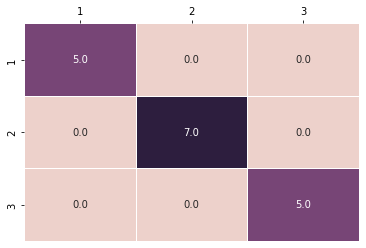

In [38]:
np.random.seed(5)
#used to predict the new optimized data
y_pred = optimized_dt.predict(X_test) 

accuracy  = accuracy_score(y_test, y_pred) # calculates the accuracy score
report = classification_report(y_test, y_pred) # X test classification report
cm = confusion_matrix(y_test, y_pred) # to calculate the confusion matrix of x test

print("The accuracy of the Decision Tree is", accuracy); 
print(report)
heatMapPlot = sns.heatmap(cm, cmap =sns.cubehelix_palette(as_cmap=True), annot = True, cbar = False, xticklabels = ["1", "2", "3"], yticklabels = ["1", "2", "3"],linewidth=.5,fmt=".1f")
heatMapPlot.xaxis.tick_top()

In [39]:
print("F Score:", f1_score(y_test, y_pred, average ='weighted'))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred, average ='weighted'))
print("Recall Score:", recall_score(y_test, y_pred, average ='weighted'))

F Score: 1.0
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


## Neural Network

Code source: https://www.youtube.com/watch?v=8zwILUzux6o

## Naïve Bayes

Code source: https://www.youtube.com/watch?v=Q93IWdj5Td4

https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

Build Naive Bayes Classifier:

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

Test accuracy of the Naive Bayes Classifier:

In [42]:
evaluation_metrics(X_test, y_test)

NameError: name 'evaluation_metrics' is not defined

Finetune the hyperparameters of Naive Bayes Classifier while applying 10-fold cross-validation:

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_params = {'var_smoothing': np.logspace(0,-9, num=100)}

clf_grid_search = GridSearchCV(estimator=clf, param_grid=clf_params, cv=10, verbose=1, scoring='accuracy') 
clf_grid_search.fit(X_train, y_train)
print(clf_grid_search.best_params_)
print(clf_grid_search.best_score_)

In [ ]:
clf = GaussianNB(var_smoothing = 6.579332246575683e-06)
clf.fit(X_train, y_train)

In [ ]:
evaluation_metrics(X_test, y_test)

## K-Nearest Neighbor